In [3]:
#01.12.2022_Метод_Бутстреп
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [5]:
orders=pd.read_excel('boot.xlsx')
orders

,user_id,revenue
0,3428,1085.327464
1,3184,1085.654927
2,2393,1087.619709
3,1766,1088.438368
4,1093,1092.040468
...,...,...
4225,3324,6446.561632
4226,1683,6447.380291
4227,959,6447.707755
4228,504,6449.017609


In [6]:
orders.dtypes

user_id      int64
revenue    float64
dtype: object

In [7]:
orders.shape

(4230, 2)

In [13]:
boot_it = 2000
boot_data = []
boot_conf_level = 0.95
for i in range(boot_it):
    samples = orders['revenue'].sample(len(orders['revenue']), replace = True)
    boot_data.append(np.mean(samples))
print(f'Original: {np.mean(orders["revenue"])}, Boot: {np.mean(boot_data)}')

Original: 3740.3890325351117, Boot: 3739.821762994049


In [14]:
#Найдем доверительный интервал
left_ci = (1 - boot_conf_level)/2
right_ci = 1 - (1 - boot_conf_level) / 2
ci = pd.Series(boot_data).quantile([left_ci, right_ci])
print(ci)

0.025    3694.756423
0.975    3787.416098
dtype: float64


In [15]:
np.percentile(boot_data, 2.5)

3694.756423495111

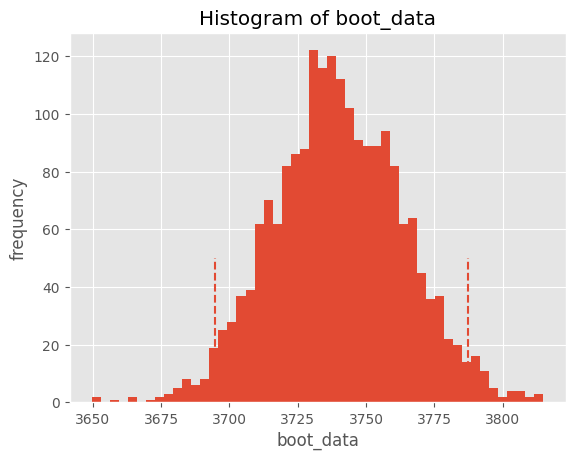

In [16]:
plt.hist(pd.Series(boot_data), bins = 50)
plt.style.use('ggplot')
plt.vlines(ci,ymin=0,ymax=50,linestyle='--')
plt.xlabel('boot_data')
plt.ylabel('frequency')
plt.title("Histogram of boot_data")
plt.show()

In [17]:
!pip install bootstrapped

Defaulting to user installation because normal site-packages is not writeable

You should consider upgrading via the 'C:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.



Using legacy 'setup.py install' for bootstrapped, since package 'wheel' is not installed.
    Running setup.py install for bootstrapped: started
    Running setup.py install for bootstrapped: finished with status 'done'
